In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv('../../data/processed/data.csv')
df.head(5)

,name,genre,tomatometer_score,tomatometer_count,audience_score,audience_count,classification,runtime,release_year,original_language
0,A Castle for Christmas,Holiday,0.74,23.0,0.40,100.0,Not Rated,98.0,2021,English
1,Pinocchio,Kids & family,1.00,61.0,0.73,250000.0,G,87.0,1940,English
2,The Informer,Mystery & thriller,0.64,58.0,0.60,250.0,R,113.0,2019,English
3,They Cloned Tyrone,Sci-fi,0.95,129.0,1.00,25.0,R,122.0,2023,English
4,1917,War,0.89,472.0,0.88,25000.0,R,119.0,2019,English


## 3. What genre would people/ critics prefer to watch (audience/ tomatometer count) ?

To see what genres that people'd prefer to watch, first we'll focus on 2 fields: audience_count and tomatometer_count since the number of rating for each movie would present the number of people that have watched that movie. First, we'll consider the total rating count of both audience and tomatometer. We can do this by group the movies by genre and count each genre sum of ratings. 

In [39]:
df_copy = df.copy()
df_copy['Total rating count'] = df_copy['audience_count'] + df_copy['tomatometer_count']
grouped_df = df_copy.groupby('genre').sum()
df_sorted = grouped_df.sort_values(by='Total rating count', ascending=False)

print('median:', df_sorted['Total rating count'].median())

median: 1910805.0


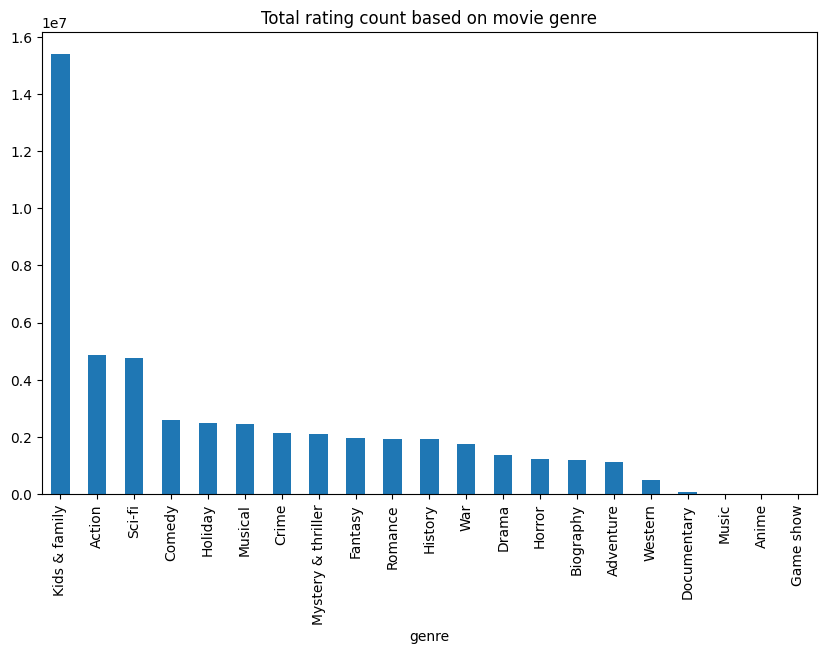

In [61]:
#draw bar chart of Total rating count based on movie genre
plt.figure(figsize=(10,6))
df_sorted['Total rating count'].plot(kind='bar')
plt.title('Total rating count based on movie genre')
plt.show()

As we can see there's a big gap between these genres number of ratings. <br>
<li><b>Kids & family</b> has the largest count with more than 15 million ratings, which is about 7.5 times higher than the medium number of rating. This suggests that movies in this genre tend to attract a large viewership, likely due to their appeal to both children and families. 
<li><b>Action</b> and <b>Sci-fi</b> come next in the top total rating count, with 4,857,929 and 4,747,168 respectively. This may indicate a strong interest among audiences for movies that offer thrilling action sequences and futuristic or science fiction elements. 
<li>Comedy, Holiday, Musical, Crime, Mystery & thriller, Fantasy, Romance, History and War also have notable total rating counts, this suggest these genres have a substantial following. 
<li>The other genres like Documentary, Music and Anime, Gameshow have least rating count, this may indicate these genres are specifically appealed to viewers. 

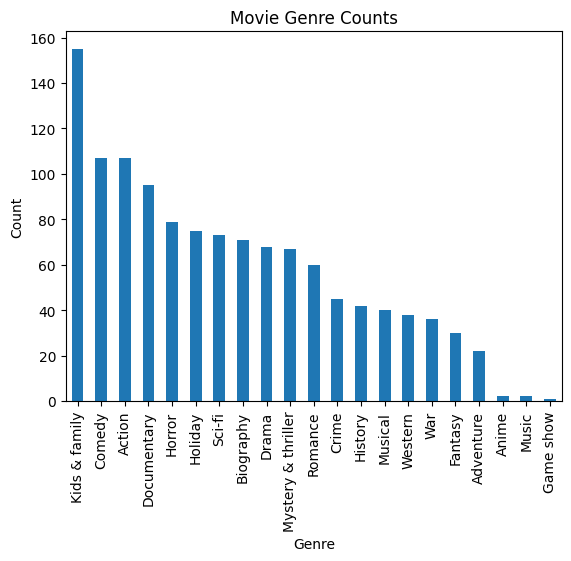

In [46]:
movie_genre_count = df['genre'].value_counts()
movie_genre_count.plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Movie Genre Counts')

plt.show()

We can examine the a further reason for people prefer to watch a certain movie genres more than others by examining the number of movies in each genre. Some of the genres are in their order as the Total rating count, but some like Documentary, Horror still stand in top 5 genre movie counts. So these genres are really not appealed to a large number of viewers

## 4. What is the highest rate for a genre and a classification to be in a movie together?

This question may help us answer how a genre and a classification mostl likely be in a movie together to see the pattern between movie genre and classification. First, we'll count the number of genre and classification with it's movie count.

In [50]:
genre_classification_counts = df.groupby(['genre', 'classification']).size()
print(genre_classification_counts)

genre      classification
Action     Not Rated         13
           PG                 2
           PG-13             58
           R                 34
Adventure  G                  1
                             ..
Western    Not Rated          5
           PG                 1
           PG-13              6
           R                 24
           TVMA               1
Length: 91, dtype: int64


So we have 91 combination of Action and classification movies. Now, we'll sort the genre and classification counts to see the top highest count.

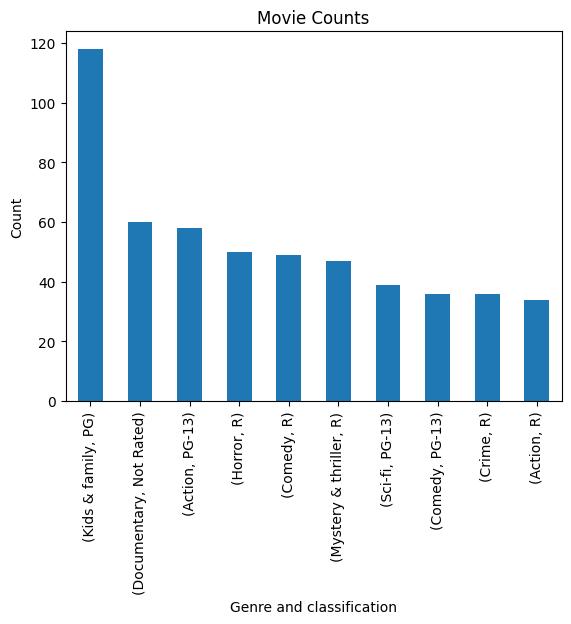

118


In [76]:
sorted_counts = genre_classification_counts.sort_values(ascending=False)
sorted_counts[:10].plot(kind='bar')
plt.xlabel('Genre and classification')
plt.ylabel('Count')
plt.title('Movie Counts')

plt.show()
print(sorted_counts[0])

We can see genre <b>Kids & family</b>, and classification <b>PG</b> has the largest movie number with <b>118</b> movies. So this suggests movies with 'Kids & family, PG' genre are suitable for general viewing, but some scenes may be unsuitable for young children.

In [66]:
total_count = genre_classification_counts.sum()
percentages = (genre_classification_counts / total_count) * 100
sorted_percentages = percentages.sort_values(ascending=False)
print(sorted_percentages)

genre          classification
Kids & family  PG                9.711934
Documentary    Not Rated         4.938272
Action         PG-13             4.773663
Horror         R                 4.115226
Comedy         R                 4.032922
                                   ...   
Horror         TVMA              0.082305
Comedy         TV14              0.082305
Kids & family  TVPG              0.082305
Music          Not Rated         0.082305
Western        TVMA              0.082305
Length: 91, dtype: float64


So there's about <b>10%</b> for a movie to have <b>Kids & family</b> genre and <b>PG</b> classification to stand together